In [39]:
# Ariadne Selena Romero Rivero #1957540
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../videogamesales/videogamesales_clean.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16322,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16323,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16324,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16325,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# Ventas en 1 año de todos los videojuegos
annual_sales = data.groupby('Year')['Global_Sales'].sum().reset_index()
annual_sales

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


In [33]:
annual_sales = annual_sales[annual_sales['Year'] < 2016]
annual_sales

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


In [34]:
# Características
X = annual_sales[['Year']]
y = annual_sales['Global_Sales']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
model = LinearRegression()
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Coeficientes
coef = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)

# Evaluación
print("Resultados del Modelo de Regresión Lineal")
print("----------------------------------------")
print("Coeficientes:", coef)
print("Intercepto:", intercept)
print(f"Coeficiente de determinación R²: {r2:.3f}")

Resultados del Modelo de Regresión Lineal
----------------------------------------
Coeficientes: 18.40822969187675
Intercepto: -36518.81612324929
Coeficiente de determinación R²: 0.767


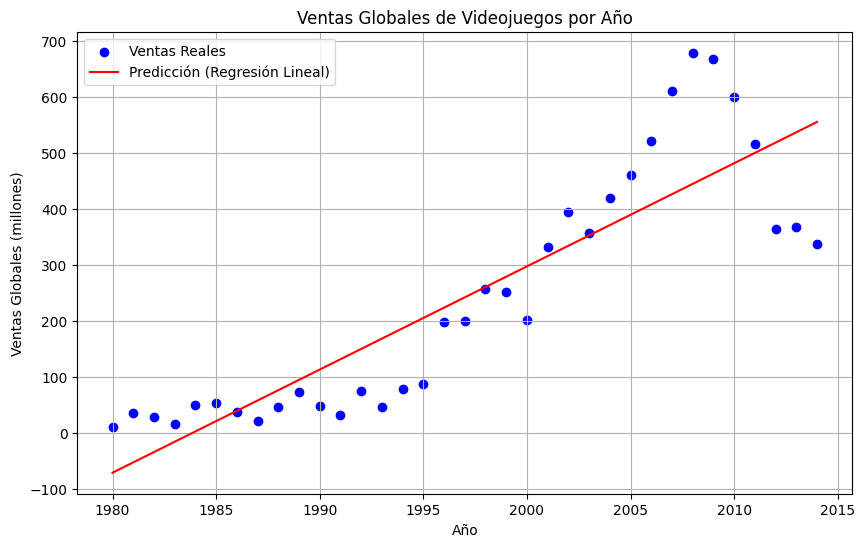

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Ventas Reales')
plt.plot(X, y_pred, color='red', label='Predicción (Regresión Lineal)')
plt.title('Ventas Globales de Videojuegos por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Predecir para los próximos 5 años
años_futuros = pd.DataFrame({'Year': np.arange(2015, 2023)})
ventas_futuras = model.predict(años_futuros)

# Mostrar resultados
predicciones = años_futuros.copy()
predicciones['Ventas_Previstas'] = ventas_futuras
print(predicciones)

   Year  Ventas_Previstas
0  2015        573.766706
1  2016        592.174936
2  2017        610.583165
3  2018        628.991395
4  2019        647.399625
5  2020        665.807854
6  2021        684.216084
7  2022        702.624314
